In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
full = cv2.imread('Computer-Vision-with-Python/DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


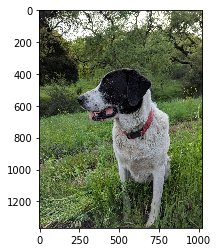

In [4]:
plt.imshow(full)

In [5]:
face = cv2.imread('Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


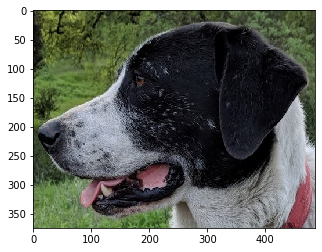

In [6]:
plt.imshow(face)

In [7]:
face.shape

(375, 486, 3)

In [8]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']



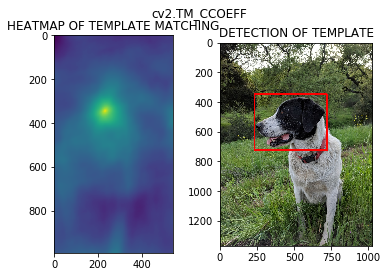

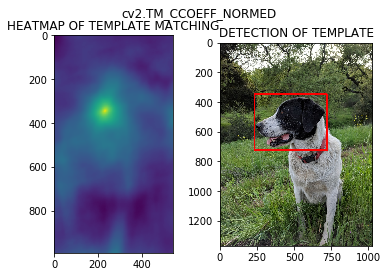

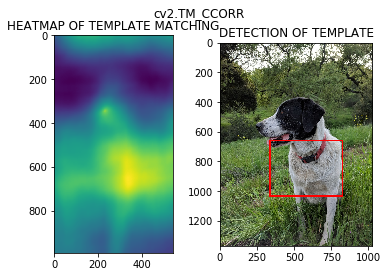

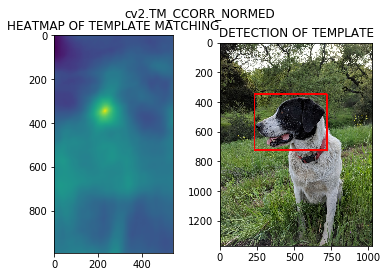

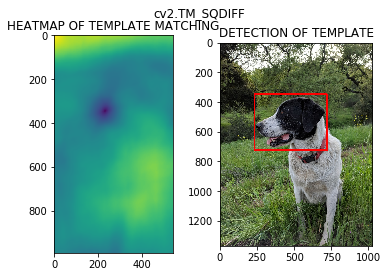

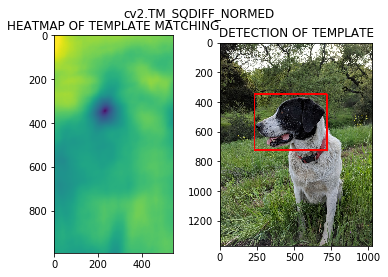

In [11]:
for m in methods:
    # create a copy of the image 
    full_copy = full.copy()
    
    method = eval(m)
    
    # template matching
    res = cv2.matchTemplate(full_copy, face, method)
    
    # gets the important points from the algorithms 
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # some methods work in opposite ways, highlighting the areas
    # minimum chance of matching the image
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc # (x,y)
        
    else:
        top_left = max_loc
    
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy,top_left, bottom_right,(255,0,0), 10)
    
    # plot and show the images 
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    # title with the method used
    plt.suptitle(m)
    
    plt.show() # similar to hold on
    print('\n')
    print('\n')